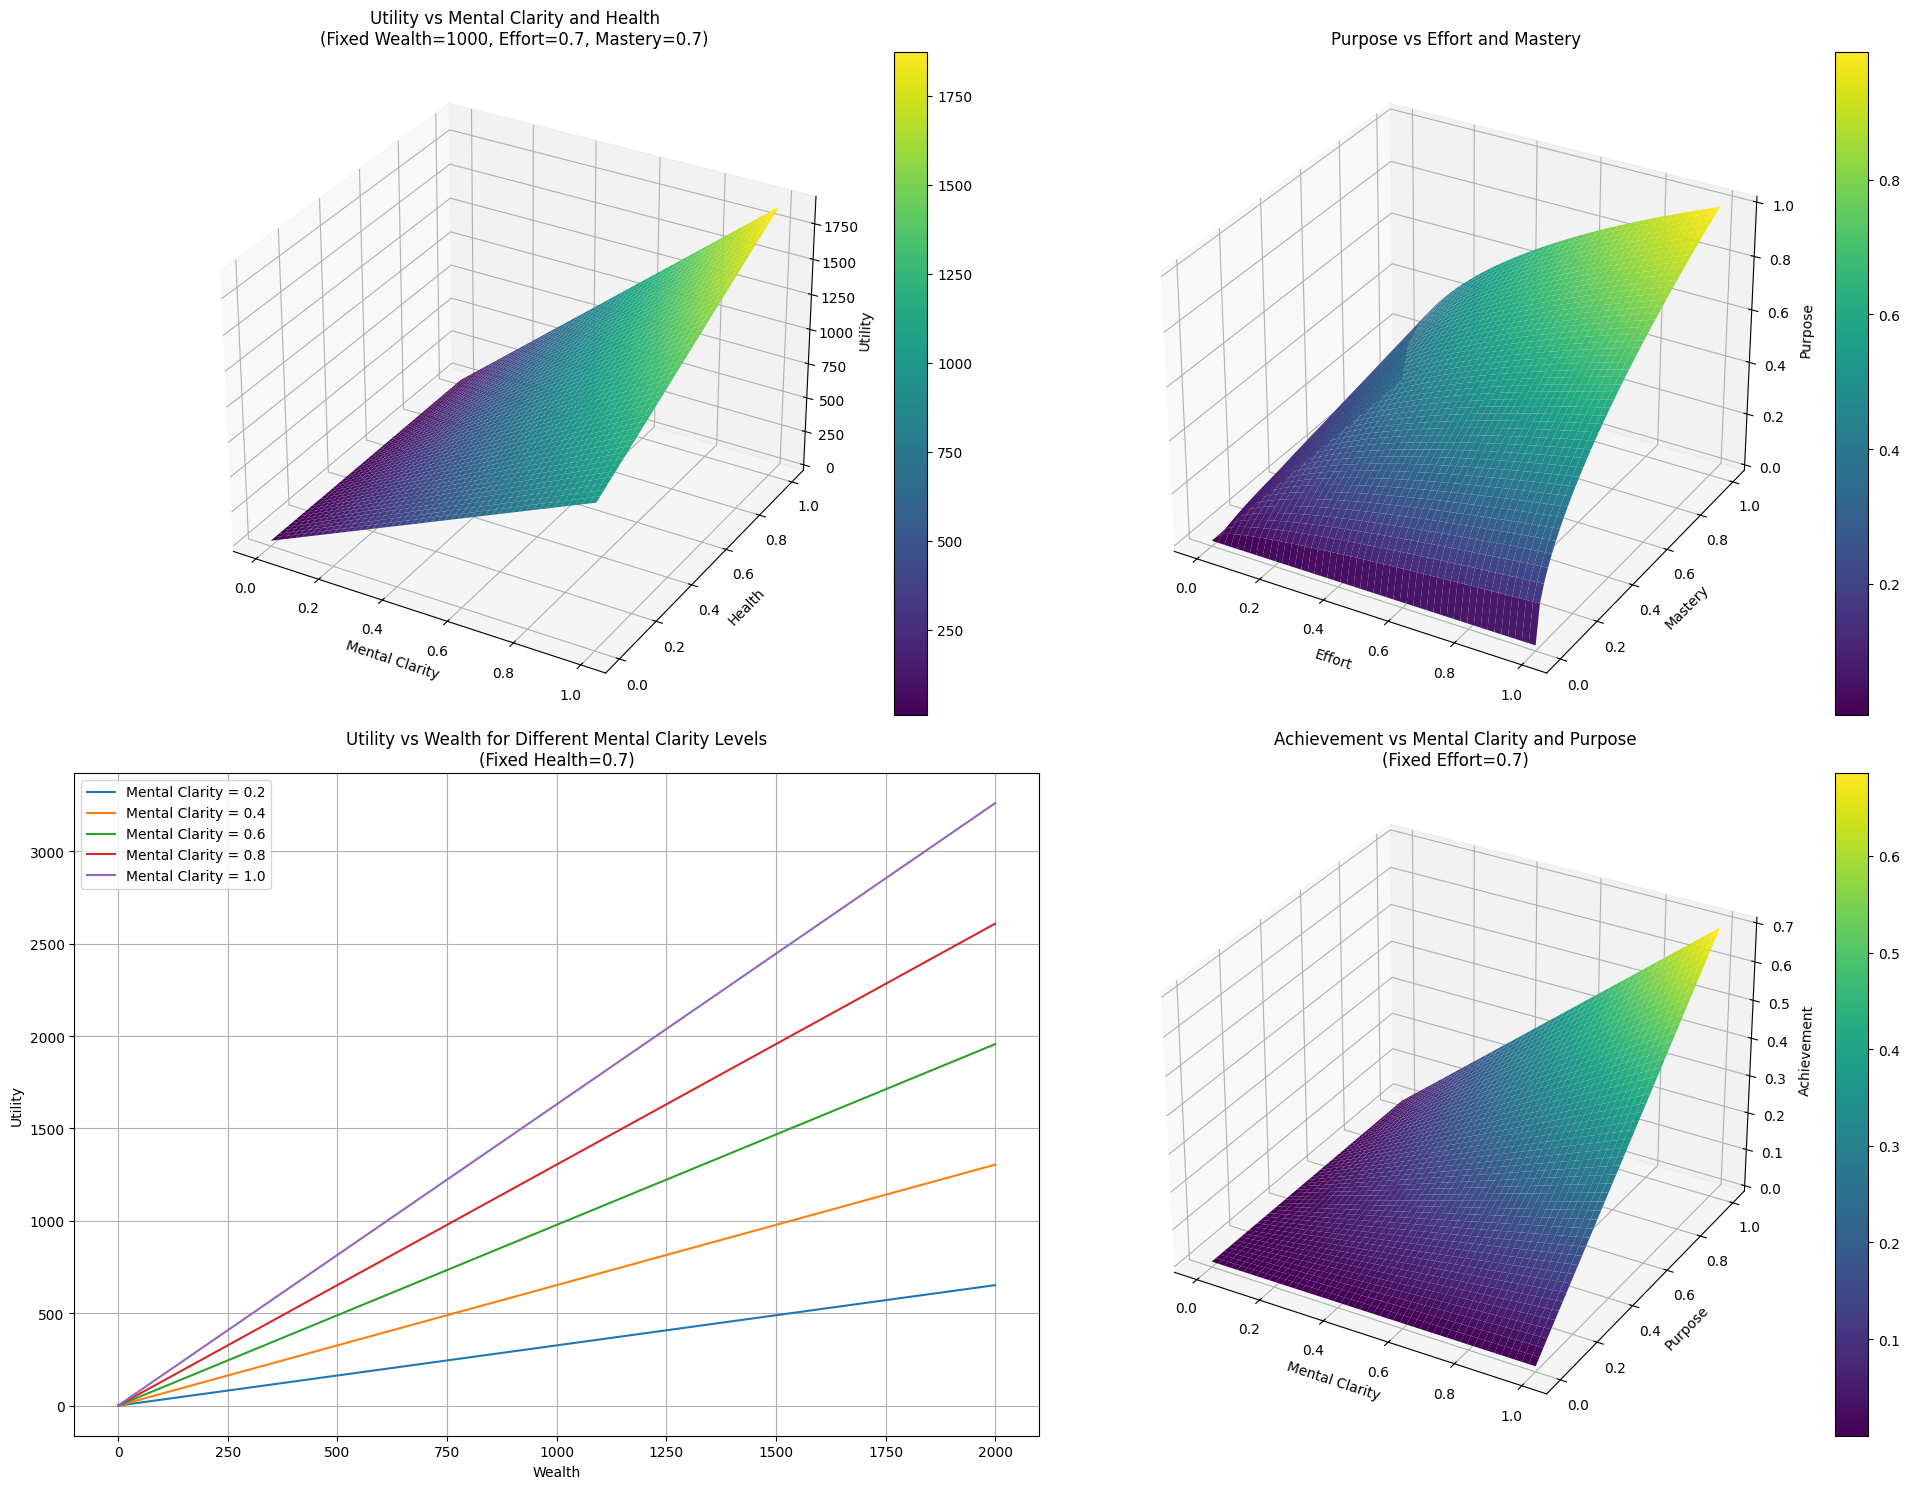


Example Scenarios:
--------------------------------------------------

High Performance:
Inputs:
  mental_clarity: 0.9
  health: 0.9
  wealth: 1000
  effort: 0.8
  mastery: 0.8
Outputs:
  Utility: 1629.84
  Purpose: 0.80
  Achievement: 0.58

Average State:
Inputs:
  mental_clarity: 0.5
  health: 0.5
  wealth: 500
  effort: 0.5
  mastery: 0.5
Outputs:
  Utility: 362.58
  Purpose: 0.50
  Achievement: 0.12

Struggling State:
Inputs:
  mental_clarity: 0.2
  health: 0.5
  wealth: 52.66
  effort: 0.6
  mastery: 0.4
Outputs:
  Utility: 15.29
  Purpose: 0.49
  Achievement: 0.06


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

class PersonalUtilityModel:
    def __init__(self, alpha=0.9, beta=0.4):
        self.alpha = alpha  # Health multiplier weight
        self.beta = beta    # Achievement weight

    def purpose_function(self, effort, mastery):
        """Calculate purpose as a function of effort and mastery"""
        return (effort * mastery) ** 0.5  # Square root to model diminishing returns

    def achievement_function(self, mental_clarity, purpose, effort):
        """Calculate achievement based on mental clarity, purpose and effort"""
        return mental_clarity * purpose * effort

    def utility(self, mental_clarity, health, wealth, effort, mastery):
        """Calculate overall utility"""
        # Bound inputs between 0 and 1
        mental_clarity = np.clip(mental_clarity, 0, 1)
        health = np.clip(health, 0, 1)
        effort = np.clip(effort, 0, 1)
        mastery = np.clip(mastery, 0, 1)

        # Calculate intermediate components
        purpose = self.purpose_function(effort, mastery)
        achievement = self.achievement_function(mental_clarity, purpose, effort)

        # Final utility calculation
        utility = mental_clarity * (1 + self.alpha * health) * (wealth + self.beta * achievement)

        return utility, purpose, achievement

def plot_utility_components(model):
    """Create various plots to visualize utility function components"""
    fig = plt.figure(figsize=(20, 15))

    # 1. Mental Clarity vs Health effect on Utility (fixed wealth)
    ax1 = fig.add_subplot(221, projection='3d')
    mc, h = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
    u, _, _ = model.utility(mc, h, 1000, 0.7, 0.7)  # Fixed moderate effort and mastery

    surf1 = ax1.plot_surface(mc, h, u, cmap='viridis')
    ax1.set_xlabel('Mental Clarity')
    ax1.set_ylabel('Health')
    ax1.set_zlabel('Utility')
    ax1.set_title('Utility vs Mental Clarity and Health\n(Fixed Wealth=1000, Effort=0.7, Mastery=0.7)')
    plt.colorbar(surf1, ax=ax1)

    # 2. Effort vs Mastery effect on Purpose
    ax2 = fig.add_subplot(222, projection='3d')
    e, m = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
    p = model.purpose_function(e, m)

    surf2 = ax2.plot_surface(e, m, p, cmap='viridis')
    ax2.set_xlabel('Effort')
    ax2.set_ylabel('Mastery')
    ax2.set_zlabel('Purpose')
    ax2.set_title('Purpose vs Effort and Mastery')
    plt.colorbar(surf2, ax=ax2)

    # 3. Wealth scaling with Mental Clarity
    ax3 = fig.add_subplot(223)
    wealth_range = np.linspace(0, 2000, 100)
    mental_clarity_levels = [0.2, 0.4, 0.6, 0.8, 1.0]

    for mc in mental_clarity_levels:
        utilities = [model.utility(mc, 0.7, w, 0.7, 0.7)[0] for w in wealth_range]
        ax3.plot(wealth_range, utilities, label=f'Mental Clarity = {mc}')

    ax3.set_xlabel('Wealth')
    ax3.set_ylabel('Utility')
    ax3.set_title('Utility vs Wealth for Different Mental Clarity Levels\n(Fixed Health=0.7)')
    ax3.legend()
    ax3.grid(True)

    # 4. Achievement vs Mental Clarity and Purpose
    ax4 = fig.add_subplot(224, projection='3d')
    mc, p = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
    a = model.achievement_function(mc, p, 0.7)  # Fixed moderate effort

    surf4 = ax4.plot_surface(mc, p, a, cmap='viridis')
    ax4.set_xlabel('Mental Clarity')
    ax4.set_ylabel('Purpose')
    ax4.set_zlabel('Achievement')
    ax4.set_title('Achievement vs Mental Clarity and Purpose\n(Fixed Effort=0.7)')
    plt.colorbar(surf4, ax=ax4)

    plt.tight_layout()
    plt.show()

    return fig

# Create model instance and generate plots
model = PersonalUtilityModel(alpha=0.9, beta=0.9)
fig = plot_utility_components(model)

# Example calculations
example_scenarios = [
    {
        'mental_clarity': 0.9,
        'health': 0.9,
        'wealth': 1000,
        'effort': 0.8,
        'mastery': 0.8,
        'description': 'High Performance'
    },
    {
        'mental_clarity': 0.5,
        'health': 0.5,
        'wealth': 500,
        'effort': 0.5,
        'mastery': 0.5,
        'description': 'Average State'
    },
    {
        'mental_clarity': 0.2,
        'health': 0.5,
        'wealth': 52.66,
        'effort': 0.6,
        'mastery': 0.4,
        'description': 'Struggling State'
    }
]

print("\nExample Scenarios:")
print("-" * 50)
for scenario in example_scenarios:
    utility, purpose, achievement = model.utility(
        scenario['mental_clarity'],
        scenario['health'],
        scenario['wealth'],
        scenario['effort'],
        scenario['mastery']
    )
    print(f"\n{scenario['description']}:")
    print(f"Inputs:")
    for key, value in scenario.items():
        if key != 'description':
            print(f"  {key}: {value}")
    print(f"Outputs:")
    print(f"  Utility: {utility:.2f}")
    print(f"  Purpose: {purpose:.2f}")
    print(f"  Achievement: {achievement:.2f}")

# Optimizing that utility function.



Optimizing for scenario: Base Case
Optimization successful!
Optimal values:
  Mental Clarity: 1.000
  Health: 1.000
  Wealth: 2000.000
  Effort: 1.000
  Mastery: 1.000
Resulting:
  Purpose: 1.000
  Achievement: 1.000
  Utility: 3000.450

Optimizing for scenario: Limited Wealth
Optimization successful!
Optimal values:
  Mental Clarity: 1.000
  Health: 1.000
  Wealth: 1000.000
  Effort: 1.000
  Mastery: 1.000
Resulting:
  Purpose: 1.000
  Achievement: 1.000
  Utility: 1500.450

Optimizing for scenario: High Effort Required
Optimization successful!
Optimal values:
  Mental Clarity: 1.000
  Health: 1.000
  Wealth: 2000.000
  Effort: 1.000
  Mastery: 1.000
Resulting:
  Purpose: 1.000
  Achievement: 1.000
  Utility: 3000.450


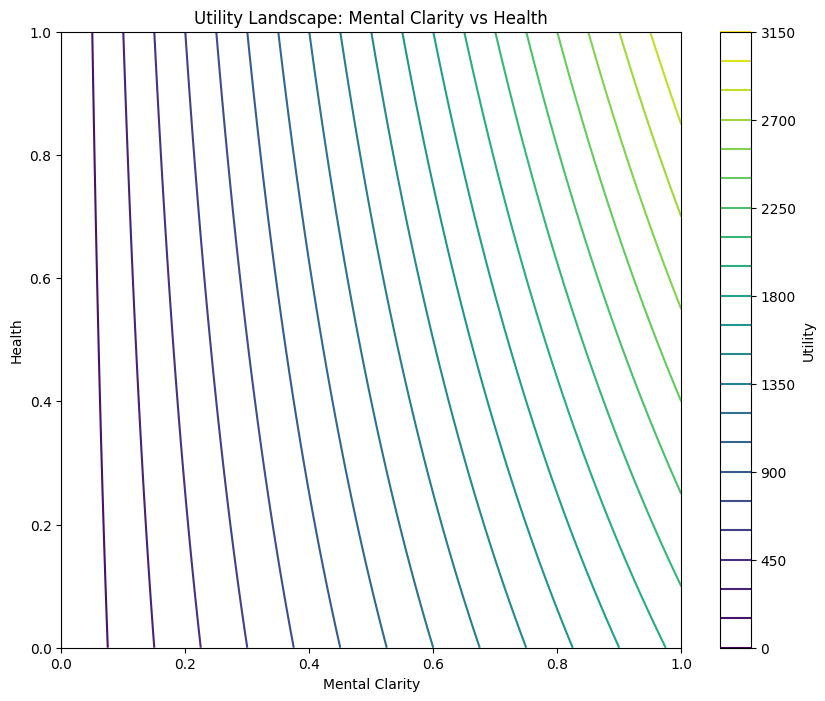

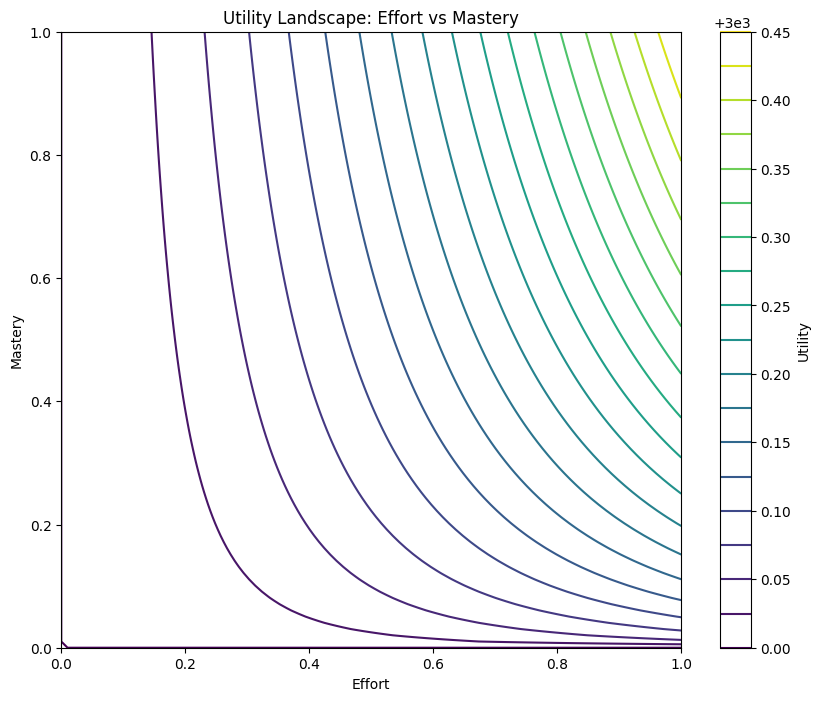

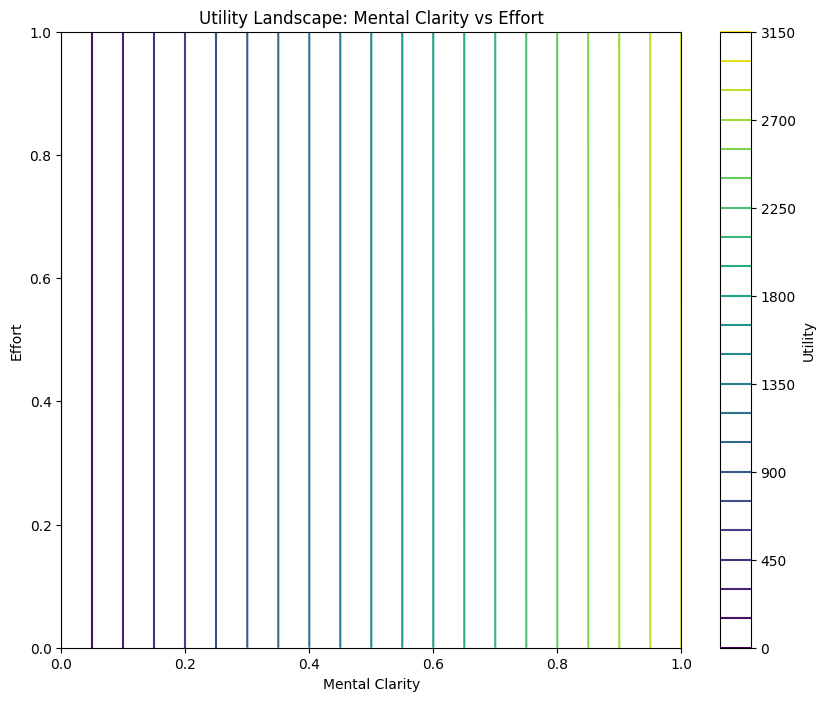

In [ ]:
import numpy as np
from scipy.optimize import minimize, Bounds, LinearConstraint
import matplotlib.pyplot as plt
import seaborn as sns

class UtilityOptimizer:
    def __init__(self, alpha=0.9, beta=0.9, initial_wealth=52.66):
        self.alpha = alpha  # Health multiplier weight
        self.beta = beta    # Achievement weight
        self.initial_wealth = initial_wealth

    def purpose_function(self, effort, mastery):
        """Calculate purpose as a function of effort and mastery"""
        return np.sqrt(effort * mastery)

    def achievement_function(self, mental_clarity, purpose, effort):
        """Calculate achievement based on mental clarity, purpose and effort"""
        return mental_clarity * purpose * effort

    def negative_utility(self, x):
        """
        Calculate negative utility (for minimization)
        x = [mental_clarity, health, wealth, effort, mastery]
        """
        mental_clarity, health, wealth, effort, mastery = x

        # Calculate intermediate components
        purpose = self.purpose_function(effort, mastery)
        achievement = self.achievement_function(mental_clarity, purpose, effort)

        # Calculate utility
        utility = mental_clarity * (1 + self.alpha * health) * (wealth + self.beta * achievement)

        return -utility  # Return negative for minimization

    def optimize(self, constraints=None, bounds=None):
        """
        Optimize the utility function given constraints and bounds
        """
        # Default bounds if none provided
        if bounds is None:
            bounds = Bounds(
                [0, 0, 0, 0, 0],  # lower bounds
                [1, 1, np.inf, 1, 1]  # upper bounds
            )

        # Initial guess
        x0 = [0.5, 0.5, self.initial_wealth, 0.5, 0.5]

        # Add default constraints if none provided
        if constraints is None:
            # Example constraint: wealth <= initial_wealth * 2
            constraints = [
                {'type': 'ineq', 'fun': lambda x: 2 * self.initial_wealth - x[2]},  # wealth constraint
                # Add more constraints as needed
            ]

        # Optimize
        result = minimize(
            self.negative_utility,
            x0,
            method='SLSQP',  # Sequential Least SQuares Programming
            bounds=bounds,
            constraints=constraints
        )

        return result

    def plot_optimization_landscape(self, var1_idx, var2_idx, fixed_values):
        """
        Plot the optimization landscape for two variables while holding others fixed
        """
        var_names = ['Mental Clarity', 'Health', 'Wealth', 'Effort', 'Mastery']

        # Create meshgrid for the two variables
        x = np.linspace(0, 1, 100)
        y = np.linspace(0, 1, 100)
        X, Y = np.meshgrid(x, y)
        Z = np.zeros_like(X)

        # Calculate utility for each point
        for i in range(len(x)):
            for j in range(len(y)):
                point = list(fixed_values)
                point[var1_idx] = X[i,j]
                point[var2_idx] = Y[i,j]
                Z[i,j] = -self.negative_utility(point)

        # Create plot
        plt.figure(figsize=(10, 8))
        plt.contour(X, Y, Z, levels=20)
        plt.colorbar(label='Utility')
        plt.xlabel(var_names[var1_idx])
        plt.ylabel(var_names[var2_idx])
        plt.title(f'Utility Landscape: {var_names[var1_idx]} vs {var_names[var2_idx]}')
        plt.show()

def analyze_optimization_results():
    # Create optimizer instance
    optimizer = UtilityOptimizer(alpha=0.5, beta=0.3, initial_wealth=1000)

    # Define different scenarios with various constraints
    scenarios = [
        {
            'name': 'Base Case',
            'constraints': None,
            'bounds': Bounds([0, 0, 0, 0, 0], [1, 1, 2000, 1, 1])
        },
        {
            'name': 'Limited Wealth',
            'constraints': [
                {'type': 'ineq', 'fun': lambda x: 1000 - x[2]}  # wealth <= 1000
            ],
            'bounds': Bounds([0, 0, 0, 0, 0], [1, 1, 1000, 1, 1])
        },
        {
            'name': 'High Effort Required',
            'constraints': [
                {'type': 'ineq', 'fun': lambda x: x[3] - 0.7}  # effort >= 0.7
            ],
            'bounds': Bounds([0, 0, 0, 0.7, 0], [1, 1, 2000, 1, 1])
        }
    ]

    # Run optimization for each scenario
    results = []
    for scenario in scenarios:
        print(f"\nOptimizing for scenario: {scenario['name']}")
        result = optimizer.optimize(
            constraints=scenario['constraints'],
            bounds=scenario['bounds']
        )

        if result.success:
            mc, h, w, e, m = result.x
            utility = -optimizer.negative_utility(result.x)
            purpose = optimizer.purpose_function(e, m)
            achievement = optimizer.achievement_function(mc, purpose, e)

            results.append({
                'Scenario': scenario['name'],
                'Mental Clarity': mc,
                'Health': h,
                'Wealth': w,
                'Effort': e,
                'Mastery': m,
                'Purpose': purpose,
                'Achievement': achievement,
                'Utility': utility
            })

            print(f"Optimization successful!")
            print(f"Optimal values:")
            print(f"  Mental Clarity: {mc:.3f}")
            print(f"  Health: {h:.3f}")
            print(f"  Wealth: {w:.3f}")
            print(f"  Effort: {e:.3f}")
            print(f"  Mastery: {m:.3f}")
            print(f"Resulting:")
            print(f"  Purpose: {purpose:.3f}")
            print(f"  Achievement: {achievement:.3f}")
            print(f"  Utility: {utility:.3f}")
        else:
            print(f"Optimization failed: {result.message}")

    # Create visualization of the optimization landscape
    if results:
        # Plot landscape for mental clarity vs health
        optimal_point = results[0]  # Use base case
        fixed_values = [
            optimal_point['Mental Clarity'],
            optimal_point['Health'],
            optimal_point['Wealth'],
            optimal_point['Effort'],
            optimal_point['Mastery']
        ]

        # Plot various combinations
        var_pairs = [(0,1), (3,4), (0,3)]  # Mental Clarity vs Health, Effort vs Mastery, Mental Clarity vs Effort
        for var1_idx, var2_idx in var_pairs:
            optimizer.plot_optimization_landscape(var1_idx, var2_idx, fixed_values)

    return results

# Run the optimization analysis
results = analyze_optimization_results()